# 신용거래 데이터로 사기 거래 예측

신용거래 데이터로 사기 거래 여부를 예측하는 모델을 구축해보자.

데이터를 통해 사기 거래가 발생할 수 있는 패턴을 가정하고,
이를 반영한 변수들을 생성하는 방향으로 진행하였다.

In [648]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv("fraud.csv")
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,...,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,...,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,...,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


## 데이터 확인

In [649]:
# 데이터 확인
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [650]:
#결측치 확인
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

결측치를 확인한 결과, 존재하지 않는 것으로 보여 따로 처리는 수행하지 않았다.

In [651]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [652]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [653]:
# 불필요한 컬럼 제거
drop_cols = [
    "first", # 이름
    "last", # 성
    "trans_num", # 거래 번호
    "street", # 거리
    "city", # 도시
    "state", # 주
    "zip", # 우편번호
    "unix_time" # 유닉스 시간
]
df = df.drop(columns=drop_cols)

df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

모델 학습에 직접적으로 필요하지 않다고 판닪나 성격의 컬럼을 우선적으로 제거하였다.

## 시간

사기는 보통 평소 패턴과 다른 시간대(예: 새벽 시간)에 발생할 가능성이 높다고 생각했다. 

In [654]:
# 거래 시간
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

df["trans_date_trans_time"]

0        2019-01-01 00:00:44
1        2019-01-01 00:12:34
2        2019-01-01 00:17:16
3        2019-01-01 00:20:15
4        2019-01-01 00:23:41
                 ...        
491129   2020-12-31 23:56:48
491130   2020-12-31 23:56:57
491131   2020-12-31 23:59:09
491132   2020-12-31 23:59:15
491133   2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 491134, dtype: datetime64[ns]

In [655]:
# 시간을 추출
df["hour"] = df["trans_date_trans_time"].dt.hour

In [ ]:
df["hour"].value_counts().sort_index()

거래 시간을 추출하였다.

In [657]:
# 낮과 밤 컬럼 생성
# 밤 12~6시
df["is_night"] = (df["hour"] <= 6).astype(int)

밤/낮으로 구분하여 사기 비율을 확인하였다.

In [658]:
df.groupby("is_night")["is_fraud"].mean()

is_night
0    0.001598
1    0.007304
Name: is_fraud, dtype: float64

밤 거래가 낮 거래보다 사기 비율이 더 높게 나타났다.

In [659]:
df.groupby("is_night").agg(
    거래수=("is_fraud","count"),
    사기비율=("is_fraud","mean")
)

,거래수,사기비율
is_night,,
0,410633,0.001598
1,80501,0.007304


고객별 평균 거래 시간과 거래 시간이 다르면 사기가 아닐까?


In [660]:
# 고객별 평균 거래 시간
df["user_mean_hour"] = df.groupby("cc_num")["hour"].transform("mean")

In [661]:
# 실제 거래시간과 차이
df["hour_diff"] = abs(df["hour"] - df["user_mean_hour"])
df["hour_diff"] = df["hour_diff"].apply(lambda x: min(x, 24-x))

In [662]:
df["hour_diff"].describe()

count    491134.000000
mean          5.086165
std           3.355666
min           0.002468
25%           2.027999
50%           4.950592
75%           7.950592
max          11.997532
Name: hour_diff, dtype: float64

고객별 평균 거래 시간을 계산하고, 실제 거래 시간과의 차이를 구했다.

In [663]:
df.groupby("is_fraud")["hour_diff"].mean()

is_fraud
0    5.076271
1    8.982580
Name: hour_diff, dtype: float64

고객별 평균 거래 시간과 실제 거래 시간의 차이를 계산한 결과, 사기 거래의 평균 시간 차이가 더 크게 나타났다.

## 가격

거래 금액이 크면 사기일 가능성이 높지 않을까 생각했다.

In [664]:
# 거래 금액
df["amt"].describe()

count    491134.000000
mean         69.050120
std         160.322867
min           1.000000
25%           8.960000
50%          42.170000
75%          80.330000
max       25086.940000
Name: amt, dtype: float64

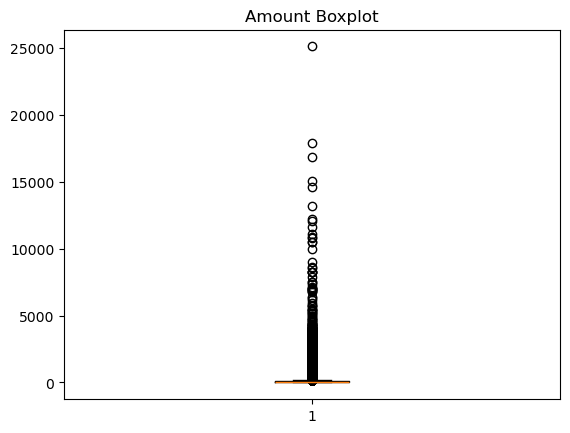

In [665]:
# 박스 플롯으로 확인

plt.boxplot(df["amt"])
plt.title("Amount Boxplot")
plt.show()

In [666]:
# 큰 값들을 직접 확인
df.sort_values("amt", ascending=False).head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,is_night,user_mean_hour,hour_diff
93045,2019-06-14 20:15:38,5540636818935089,fraud_Hackett Group,travel,25086.94,M,42.6911,-71.1605,76383,Geoscientist,1985-04-04,42.397174,-71.474163,0,20,0,13.923330,6.076670
49446,2019-04-07 15:32:23,6538441737335434,fraud_Tillman LLC,travel,17897.24,F,41.3851,-80.1752,606,Energy manager,1997-09-22,41.361042,-79.665772,0,15,0,15.049408,0.049408
410031,2020-09-21 12:02:00,3566094707272327,fraud_Johnston-Casper,travel,16837.08,F,34.3795,-118.5230,34882,Health physicist,1971-04-25,35.111725,-118.128435,0,12,0,13.973480,1.973480
198719,2019-11-17 20:00:17,2264937662466770,fraud_Goyette-Herzog,travel,15047.03,M,29.3641,-98.4924,1595797,Land,1995-10-17,29.849413,-98.224021,0,20,0,15.215890,4.784110
43412,2019-03-28 16:53:47,630451534402,fraud_Ankunding-Carroll,travel,14630.68,F,46.3535,-86.6345,765,Immunologist,1972-06-12,46.944452,-85.746696,0,16,0,14.034751,1.965249
352828,2020-07-03 18:13:00,4797297220948468262,"fraud_Hagenes, Hermann and Stroman",travel,13149.15,F,38.8938,-86.5246,1228,Counsellor,1991-03-13,39.435860,-87.298161,0,18,0,14.099097,3.900903
341782,2020-06-18 23:43:03,4908846471916297,fraud_Veum-Koelpin,travel,12176.55,F,32.2779,-97.2351,5875,"Radiographer, therapeutic",1992-07-24,32.931738,-96.358340,0,23,0,13.828114,9.171886
271107,2020-02-28 20:00:17,4099707841315751,"fraud_Eichmann, Hayes and Treutel",travel,12025.30,M,38.2586,-78.4074,9815,"Designer, ceramics/pottery",1975-07-07,37.681951,-77.443076,0,20,0,13.888372,6.111628
480766,2020-12-22 20:57:17,213156747557083,"fraud_Monahan, Hermann and Johns",travel,11586.34,M,34.1556,-118.2322,172817,Advertising account planner,1982-07-30,33.324777,-117.819696,0,20,0,13.966283,6.033717
472079,2020-12-15 18:52:51,4587657402165341815,fraud_Mosciski Group,travel,11052.59,F,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,41.703120,-87.802670,0,18,0,15.155042,2.844958


특정 category는 금액이 클 수 있지만, 실제로 사기 여부는 0이고 여행의 특성을 고려해 제거하지 않았다.

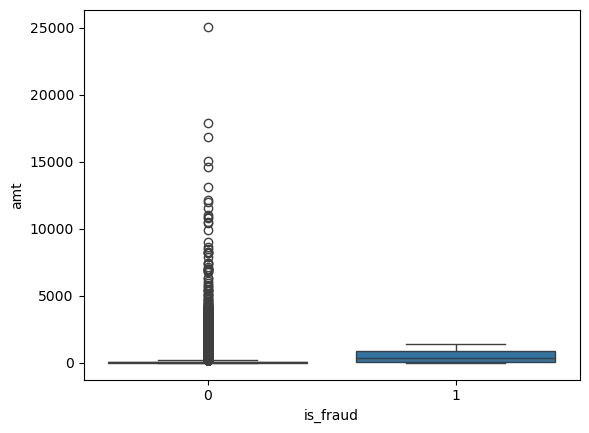

In [667]:
# 사기일때랑 아닐 때
sns.boxplot(x="is_fraud", y="amt", data=df)
plt.show()

In [668]:
# 가격 로그 변환
df["log_amt"] = np.log1p(df["amt"])

<Axes: title={'center': 'log_amt'}, xlabel='is_fraud'>

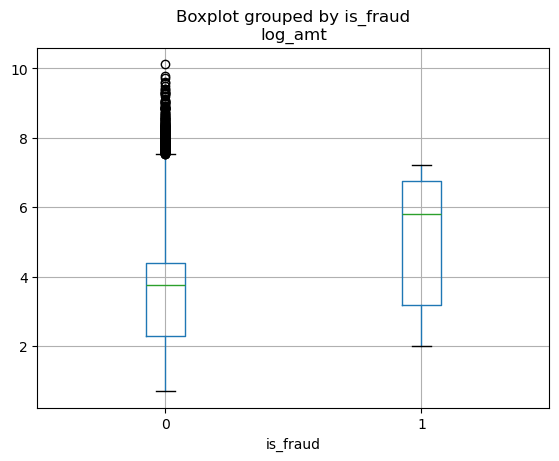

In [ ]:
# 로그 변환 그래프
df.boxplot(column="log_amt", by="is_fraud")

고객의 평균 거래 금액을 기준으로, 거래 금액이 얼마나 큰지를 나타내는 변수를 생성하였다.

In [670]:
# 고객별 평균 거래 금액
df["user_mean_amt"] = df.groupby("cc_num")["amt"].transform("mean")

In [671]:
# 평균 거래 금액 대비 비율
df["amt_ratio"] = df["amt"] / (df["user_mean_amt"] + 1)

In [672]:
df.groupby("is_fraud")["amt_ratio"].mean()

is_fraud
0    0.968391
1    7.556357
Name: amt_ratio, dtype: float64

분석 결과 사기 거래의 금액이 평소보다 큰 경우가 많았고, 사기는 평소보다 많은 금액을 사용한다고 판단하였다.

## Category

특정 업종에서 사기 거래가 많지 않을까 생각했다.

In [673]:
df["category"].value_counts()

category
shopping_pos      48345
gas_transport     46029
home              43340
grocery_pos       42722
kids_pets         40295
shopping_net      39179
food_dining       35980
personal_care     35513
entertainment     33619
misc_pos          32411
health_fitness    31415
misc_net          25179
grocery_net       24486
travel            12621
Name: count, dtype: int64

In [674]:
# 사기가 많은 종목?
df.groupby("category")["is_fraud"].mean().sort_values(ascending=False)

category
shopping_net      0.006177
grocery_pos       0.005056
misc_net          0.004329
shopping_pos      0.002772
gas_transport     0.002194
travel            0.001902
misc_pos          0.001759
food_dining       0.001723
kids_pets         0.001688
home              0.001661
personal_care     0.001633
entertainment     0.001576
health_fitness    0.001273
grocery_net       0.000327
Name: is_fraud, dtype: float64

<Axes: ylabel='category'>

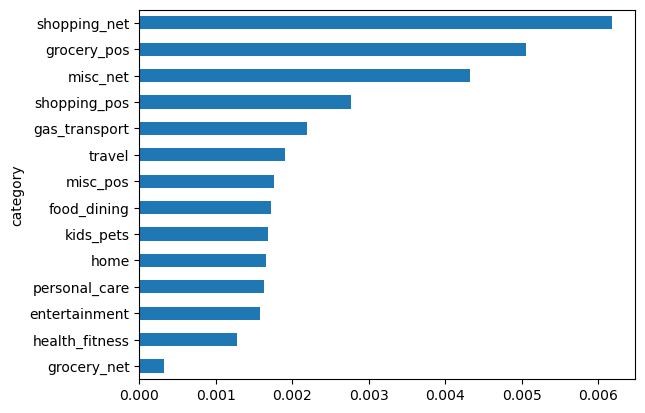

In [675]:
df.groupby("category")["is_fraud"].mean().sort_values().plot(kind="barh")

업종별 사기 비율을 확인한 결과 shopping_net,이나 grocery_pos, misc_net에서 비중이 높았다.

In [676]:
# 온라인과 오프라인으로 나눔
df["is_online"] = df["category"].str.contains("net").astype(int)

In [677]:
df["is_online"].value_counts()

is_online
0    402290
1     88844
Name: count, dtype: int64

In [678]:
df = pd.get_dummies(df, columns=["category"], drop_first=True)

업종명에서 온라인 거래 여부를 확인할 수 있어서 온라인과 오프라인으로 나누고, 카테고리를 one-hot 인코딩 하였다.

In [679]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'amt', 'gender', 'lat',
       'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'is_fraud',
       'hour', 'is_night', 'user_mean_hour', 'hour_diff', 'log_amt',
       'user_mean_amt', 'amt_ratio', 'is_online', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')

## 거리

고객 위치와 상점 거리가 멀면 사기의 가능성이 있다고 생각하였다.

In [680]:
# 위도와 경도를 이용한 거리를 계산하고 싶었다.
def calc_distance(lat1, lon1, lat2, lon2):
    R = 6371  # 지구 반지름 (km)

    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

In [681]:
df["distance_km"] = calc_distance(
    df["lat"], df["long"],
    df["merch_lat"], df["merch_long"]
)

In [682]:
# 로그 변환
df["log_distance"] = np.log1p(df["distance_km"])

<Axes: title={'center': 'log_distance'}, xlabel='is_fraud'>

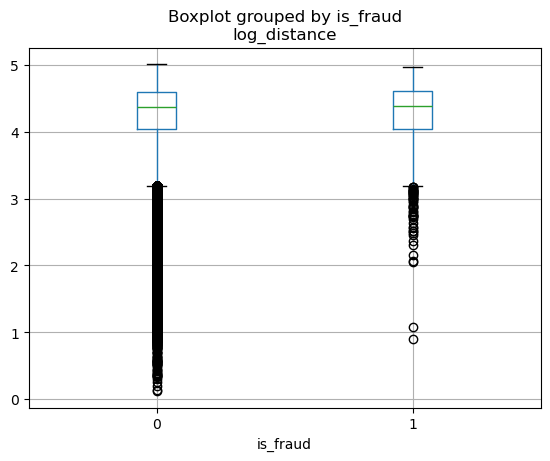

In [683]:
df.boxplot(column="log_distance", by="is_fraud")

In [684]:
df.groupby("is_fraud")["distance_km"].mean()

is_fraud
0    76.377667
1    76.763829
Name: distance_km, dtype: float64

In [685]:
df.groupby("is_fraud")["distance_km"].median()

is_fraud
0    78.538018
1    78.790257
Name: distance_km, dtype: float64

거리 자체만 보면 큰 차이가 없다고 판단해 고객 평균 이동 거리 대비 현재 거래 거리를 계산해보았다.

In [686]:
# 고객 평균 거리
df["user_mean_dist"] = df.groupby("cc_num")["distance_km"].transform("mean")

In [687]:
# 현재 거리 대비 변화
df["dist_ratio"] = df["distance_km"] / (df["user_mean_dist"] + 1)

In [688]:
# 비교
df.groupby("is_fraud")["dist_ratio"].mean()

is_fraud
0    0.987052
1    0.992407
Name: dist_ratio, dtype: float64

<Axes: title={'center': 'dist_ratio'}, xlabel='is_fraud'>

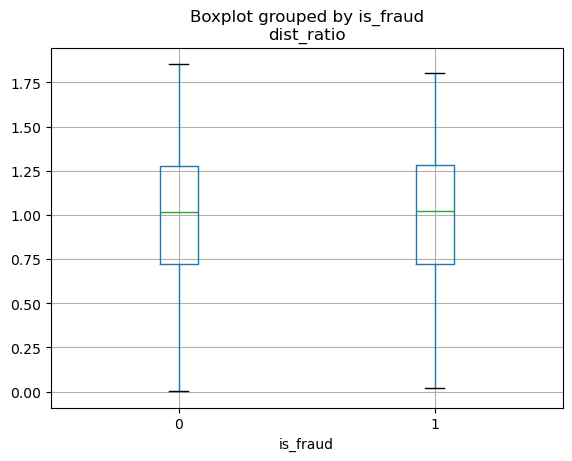

In [689]:
df.boxplot(column="dist_ratio", by="is_fraud")

큰 차이가 없다고 판단했다.

## 나이

나이가 많을수록 사기를 더 당하지 않을까 생각하였다.

In [690]:
def age_func(data):
    data["age"] = (
        pd.to_datetime(data["trans_date_trans_time"]).dt.year
        - pd.to_datetime(data["dob"]).dt.year
    )
    return data

In [691]:
df = age_func(df)

In [692]:
df["age"].describe()

count    491134.000000
mean         35.117905
std           9.304940
min          15.000000
25%          28.000000
50%          35.000000
75%          44.000000
max          50.000000
Name: age, dtype: float64

In [693]:
df[df["is_fraud"] == 1]["age"].describe()

count    1244.000000
mean       34.327974
std         9.607259
min        15.000000
25%        25.000000
50%        35.000000
75%        44.000000
max        50.000000
Name: age, dtype: float64

In [694]:
df.groupby("is_fraud")["age"].mean()

is_fraud
0    35.119911
1    34.327974
Name: age, dtype: float64

In [695]:
df.groupby("is_fraud")["age"].median()

is_fraud
0    35.0
1    35.0
Name: age, dtype: float64

<Axes: title={'center': 'age'}, xlabel='is_fraud'>

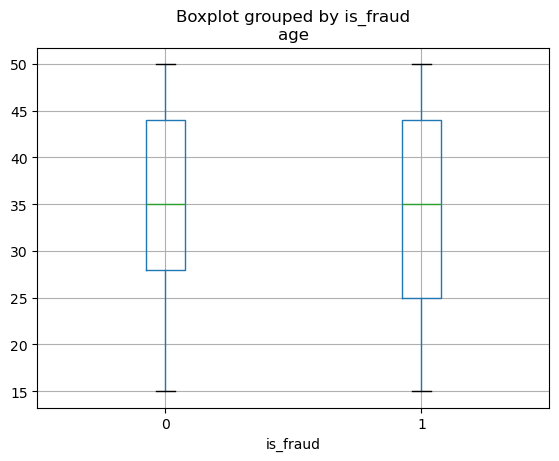

In [696]:
df.boxplot(column="age", by="is_fraud")

거래 시점과 출생년도를 이용하여 나이를 계산하고, 사기 여부에 따른 차이를 확인하였다.

## 성별

성별을 기준으로 사기 발생 비율을 계산하여 성별에 따른 차이가 존재하는지 확인하였다.

In [697]:
df.groupby("gender")["is_fraud"].mean()

gender
F    0.002406
M    0.002855
Name: is_fraud, dtype: float64

In [698]:
df = pd.get_dummies(df, columns=["gender"], drop_first=True)

## 전처리2

1차 전처리 이후 불필요한 변수를 다시 제거했다.

In [699]:
# 불필요한 컬럼 제거2
drop_cols2 = [
    "trans_date_trans_time",
    "lat",
    "long",
    "merch_lat",
    "merch_long",
    "city_pop",
    "dob"
]
df = df.drop(columns=drop_cols2)


In [700]:
df.head(10)

,cc_num,merchant,amt,job,is_fraud,hour,is_night,user_mean_hour,hour_diff,log_amt,...,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance_km,log_distance,user_mean_dist,dist_ratio,age,gender_M
0,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,Special educational needs teacher,0,0,1,14.020862,9.979138,4.684259,...,False,False,False,False,30.212176,3.440808,71.578573,0.416269,41,False
1,4956828990005111019,"fraud_Schultz, Simonis and Little",44.71,Operational researcher,0,0,1,13.878316,10.121684,3.822317,...,False,False,False,False,84.702120,4.450878,74.794086,1.117529,39,True
2,180048185037117,fraud_Kling-Grant,46.28,Leisure centre manager,0,0,1,13.899589,10.100411,3.856087,...,False,False,False,False,67.847742,4.231897,75.600781,0.885732,45,False
3,374930071163758,fraud_Deckow-O'Conner,64.09,Police officer,0,0,1,13.838223,10.161777,4.175771,...,False,False,False,False,22.303906,3.148621,74.677937,0.294721,48,True
4,2712209726293386,fraud_Balistreri-Nader,25.58,"Designer, furniture",0,0,1,14.096295,9.903705,3.280159,...,False,False,False,False,79.591943,4.389399,79.398927,0.989963,42,False
5,3598215285024754,fraud_Heidenreich PLC,207.36,"Librarian, public",0,0,1,13.870685,10.129315,5.339267,...,False,False,False,False,59.003381,4.094401,75.812138,0.768152,49,False
6,213141712584544,fraud_Halvorson Group,181.35,Fine artist,0,0,1,13.908030,10.091970,5.205928,...,False,False,False,False,61.710124,4.138523,78.718876,0.774097,35,False
7,676372984911,"fraud_Christiansen, Goyette and Schamberger",53.60,Tourism officer,0,0,1,13.869005,10.130995,4.000034,...,False,False,False,False,82.843722,4.428955,75.590091,1.081651,32,False
8,4642255475285942,fraud_Ledner-Pfannerstill,102.13,"Surveyor, minerals",0,0,1,13.899681,10.100319,4.635990,...,False,False,False,False,92.658366,4.539654,75.869936,1.205391,32,False
9,3553629419254918,fraud_Stracke-Lemke,83.07,"Research officer, political party",0,0,1,14.004337,9.995663,4.431650,...,False,False,False,False,46.982545,3.870837,71.442327,0.648551,35,False


In [701]:
df.columns

Index(['cc_num', 'merchant', 'amt', 'job', 'is_fraud', 'hour', 'is_night',
       'user_mean_hour', 'hour_diff', 'log_amt', 'user_mean_amt', 'amt_ratio',
       'is_online', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'distance_km', 'log_distance', 'user_mean_dist', 'dist_ratio', 'age',
       'gender_M'],
      dtype='object')

In [702]:
drop_cols = [
    "cc_num",
    "merchant",
    "job",
    "user_mean_hour",
    "user_mean_amt",
    "user_mean_dist",
    "amt",
    "distance_km"
]

df = df.drop(columns=drop_cols)

In [703]:
df.columns

Index(['is_fraud', 'hour', 'is_night', 'hour_diff', 'log_amt', 'amt_ratio',
       'is_online', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'log_distance', 'dist_ratio', 'age', 'gender_M'],
      dtype='object')

In [704]:
df.head()

,is_fraud,hour,is_night,hour_diff,log_amt,amt_ratio,is_online,category_food_dining,category_gas_transport,category_grocery_net,...,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,log_distance,dist_ratio,age,gender_M
0,0,0,1,9.979138,4.684259,1.878654,0,False,False,False,...,False,False,False,False,False,False,3.440808,0.416269,41,False
1,0,0,1,10.121684,3.822317,0.734660,0,False,False,False,...,False,False,False,False,False,False,4.450878,1.117529,39,True
2,0,0,1,10.100411,3.856087,0.523956,1,False,False,True,...,False,False,False,False,False,False,4.231897,0.885732,45,False
3,0,0,1,10.161777,4.175771,0.981202,0,False,False,False,...,False,False,False,False,False,False,3.148621,0.294721,48,True
4,0,0,1,9.903705,3.280159,0.278810,0,False,False,False,...,False,True,False,False,False,False,4.389399,0.989963,42,False


# 모델링

생성한 변수들로 모델을 학습한 결과, 거래 금액, 평소 대비 금액 비율, 거래 시간 차이 등이 중요한 변수로 나타났다.

In [705]:
# 데이터 분리
X = df.drop(columns=["is_fraud"])
y = df["is_fraud"]

In [ ]:
# Train/Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

사기 데이터는 불균형하기 때문에 stratify 옵션을 사용

In [ ]:
# 랜덤포레스트 모델 생성
# class_weight = "balanced" 를 사용하여 사기 데이터의 불균형을 보정
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

# 모델 학습
rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
# 모델 예측 수행
pred = rf.predict(X_test)

# ROC-AUC 계산을 위해 확률값 사용
proba = rf.predict_proba(X_test)[:,1]

# 출력
print("ROC-AUC:", roc_auc_score(y_test, proba))
print(classification_report(y_test, pred))

ROC-AUC: 0.9767302076910798
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     97978
           1       0.89      0.53      0.66       249

    accuracy                           1.00     98227
   macro avg       0.94      0.76      0.83     98227
weighted avg       1.00      1.00      1.00     98227



데이터의 불균형으로 recall은 0.53으로 낮지만 ROC-AUC는 0.97로 나옴

In [709]:
# 피처 importance 확인

importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(15)

log_amt                   0.280564
amt_ratio                 0.257664
hour_diff                 0.163884
hour                      0.098492
is_night                  0.023086
category_food_dining      0.021890
log_distance              0.019316
dist_ratio                0.019250
age                       0.018103
is_online                 0.013100
category_gas_transport    0.012472
category_home             0.009903
category_shopping_net     0.008332
category_grocery_pos      0.008293
category_shopping_pos     0.008129
dtype: float64

로지스틱 회귀 모델도 학습해보았다.

In [ ]:
# 모델 생성, 학습

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [711]:
# 예측, 평가
from sklearn.metrics import classification_report, roc_auc_score

pred = lr.predict(X_test)
proba = lr.predict_proba(X_test)[:,1]

print("ROC-AUC:", roc_auc_score(y_test, proba))
print(classification_report(y_test, pred))

ROC-AUC: 0.9506903074134911
              precision    recall  f1-score   support

           0       1.00      0.88      0.93     97978
           1       0.02      0.88      0.03       249

    accuracy                           0.88     98227
   macro avg       0.51      0.88      0.48     98227
weighted avg       1.00      0.88      0.93     98227



precision이 0.02로 오탐이 많다

# 결론

이번 분석에서는 신용거래 데이터를 이용하여 사기 거래를 예측하고자 하였다.

단순히 모델을 학습시키는 것이 아니라,
사기 거래가 고객의 평소 소비 패턴과 다른 행동에서 발생할 것이라고 가정하고
이를 반영한 파생 변수를 생성하였다.

특히 고객 평균 대비 거래 금액, 거래 시간 차이,
온라인 거래 여부 등의 변수를 생성하였으며,
모델 학습 결과 이러한 변수들이 실제로 높은 중요도를 가지는 것으로 확인되었다.

RandomForest 모델과 LogisticRegression 모델을 비교한 결과,
RandomForest 모델이 더 높은 ROC-AUC와 안정적인 성능을 보여
최종 모델로 선택하였다.

이번 분석을 통해 사기 거래는 고객의 정상적인 소비 패턴에서 벗어난
비정상적인 행동으로 나타나는 경우가 많다는 점을 확인할 수 있었다.